In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Shopping_data01.csv")
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,이익,누적노출
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01 00:00:00,2099000.0,20
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01 00:00:00,4371000.0,20
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01 00:00:00,3262000.0,40
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01 00:00:00,6955000.0,40
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01 00:00:00,6672000.0,60


## Check List

- 상품들의 전체 평균 방송 시간은?
- 방송시간의 길이는 취급액에 따라 달라질까?
- 상품군을 더 자세하게 볼 필요가 있을까?
- 판매 단가가와 상품군의 상관 관계
- 상품명에서 무이자와 일시불 차이가 클까? + (일), (무)
- 상품명에서 남성과 여성의 차이가 클까?
- 방송 시간대가 영향을 미칠까?
- 판매단가가 0인 경우 무조건 0일까?
- 취급액은 누적액일까?
    - 그럴 것으로 추정
- 취급액 / 판매단가 = 판매 수
- 판매수 누적? 20분당 판매 수?
- 취급액 -> 20분당 판매 액수 확인
- 누적 방송시간 넣기

### - 상품들의 전체 평균 방송 시간은?

- 상품코드, 누적노출 max 활용
- 상품코드별 평균 노출 시간
- 상품군별 평균 노출 시간

In [3]:
product_code = data['상품코드'].unique()
code_date_data = pd.DataFrame()

for code in product_code:
    temp = data[data['상품코드'] == code].copy()
    dates = temp['날짜'].unique()
    
    for date in dates:
        code_date_data = pd.concat([code_date_data,
                                    data[(data['상품코드'] == code) & (data['날짜'] == date)].iloc[-1]], axis=1)

In [4]:
code_date_data.head()

,4,166,5,167,8,75,309,461,11,370,...,38134,38166,38175,38209,38212,38268,38269,38270,38306,38308
방송일시,2019-01-01 06:40:00,2019-01-03 00:20:00,2019-01-01 06:40:00,2019-01-03 00:20:00,2019-01-01 07:40:00,2019-01-02 08:40:00,2019-01-04 14:40:00,2019-01-06 10:40:00,2019-01-01 08:40:00,2019-01-05 11:40:00,...,2019-12-30 01:00:00,2019-12-30 14:00:00,2019-12-30 17:00:00,2019-12-31 02:00:00,2019-12-31 07:00:00,2019-12-31 20:00:00,2019-12-31 20:00:00,2019-12-31 20:00:00,2020-01-01 01:00:00,2020-01-01 01:40:00
노출(분),20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
마더코드,100346,100346,100346,100346,100305,100305,100305,100305,100808,100808,...,100057,100338,100415,100439,100458,100594,100594,100594,100073,100490
상품코드,201072,201072,201079,201079,200974,200974,200974,200974,202377,202377,...,200142,201054,201314,201357,201416,201819,201821,201823,200196,201478
상품명,테이트 남성 셀린니트3종,테이트 남성 셀린니트3종,테이트 여성 셀린니트3종,테이트 여성 셀린니트3종,오모떼 레이스 파운데이션 브라,오모떼 레이스 파운데이션 브라,오모떼 레이스 파운데이션 브라,오모떼 레이스 파운데이션 브라,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,...,뉴트리원 다이어트 구미 시즌2,스튜디오럭스 밴딩팬츠 4종,코몽트 기모 터틀넥 5종,루시헨느 레이스 홀리데이 란쥬 패키지,크리스티나앤코 리버시블 패딩,레스토닉 블루투스 LED 서랍 침대 슈퍼싱글,레스토닉 블루투스 LED 서랍 침대 퀸,레스토닉 블루투스 LED 서랍 침대 킹,삼성화재 행복한파트너 주택화재보험(1912),더케이 예다함 상조서비스(티포트)


In [6]:
code_date_data = code_date_data.T
code_date_data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,이익,누적노출
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6.672e+06,2019-01-01 00:00:00,6.672e+06,60
166,2019-01-03 00:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,1.0481e+07,2019-01-03 00:00:00,1.0481e+07,40
5,2019-01-01 06:40:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,9.337e+06,2019-01-01 00:00:00,9.337e+06,60
167,2019-01-03 00:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,2.252e+07,2019-01-03 00:00:00,2.252e+07,40
8,2019-01-01 07:40:00,20,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,2.537e+07,2019-01-01 00:00:00,2.537e+07,60


In [79]:
code_date_data.to_csv("Shopping_data02.csv")

In [7]:
code_date_data['방송일시'] = pd.to_datetime(code_date_data['방송일시'])
code_date_data = code_date_data.sort_values("방송일시")

In [8]:
code_date_data[['판매단가', '취급액', '이익', '누적노출']] = \
code_date_data[['판매단가', '취급액', '이익', '누적노출']].fillna(0).astype(int)

In [8]:
code_date_data.describe()
# 평균 누적노출 시간: 60분
# 평균 취급액(방송의 최종 이익): 2.941390e+07
# 평균 판매단가: 4.706251e+05 
# 가장 비싼 판매단가: 7.930000e+06

,판매단가,취급액,이익,누적노출
count,1.303600e+04,1.303600e+04,1.303600e+04,13036.000000
mean,4.706251e+05,2.941390e+07,2.941390e+07,60.283062
std,7.415497e+05,2.415647e+07,2.415647e+07,11.727161
min,0.000000e+00,0.000000e+00,0.000000e+00,10.000000
25%,5.900000e+04,1.061850e+07,1.061850e+07,60.000000
50%,1.098500e+05,2.362750e+07,2.362750e+07,60.000000
75%,5.090000e+05,4.328725e+07,4.328725e+07,60.000000
max,7.930000e+06,2.410790e+08,2.410790e+08,240.000000


In [9]:
code_date_data.describe(include=['O'])

# 가장 많이 반복된 상품명: 한일 대용량 스텐스 분쇄믹서기
# 가장 많이 반복된 상품코드: 200864

,노출(분),마더코드,상품코드,상품명,상품군,날짜
count,13036,13036,13036,13036,13036,13036
unique,6,716,2124,1770,12,366
top,20,100148,200864,한일 대용량 스텐 분쇄믹서기,주방,2019-09-22 00:00:00
freq,11459,862,106,131,2276,55


In [10]:
print("1년 최종이익: \t\t", code_date_data['이익'].sum())
print("1년 총 방송 시간(분): \t", code_date_data['누적노출'].sum())
print("1년 ")

1년 최종이익: 		 383439551000
1년 총 방송 시간(분): 	 785850
1년 


### 상품군, 누적노출 상관관계

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)


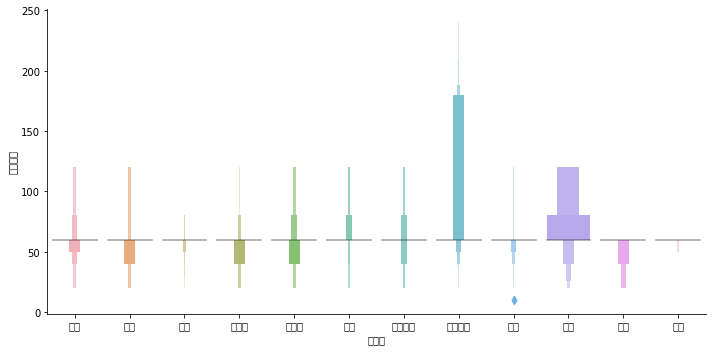

In [118]:
sns.catplot(x='상품군', y='누적노출', kind='boxen', data=code_date_data, aspect=2)
# 품목별 판매단가.

### 상품군, 판매단가 상관관계

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)


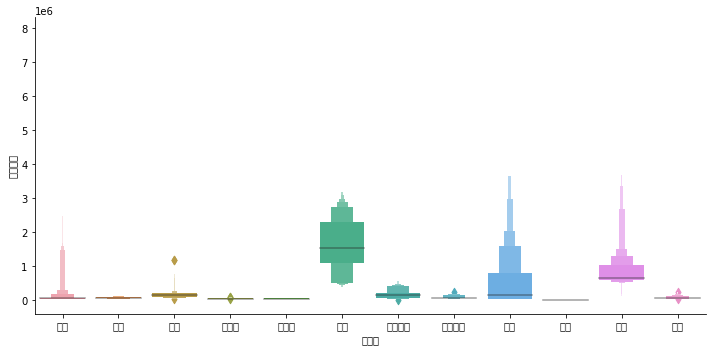

In [119]:
sns.catplot(x='상품군', y='판매단가', kind='boxen', data=code_date_data, aspect=2)
# 품목별 판매단가.

/home/jaewon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend

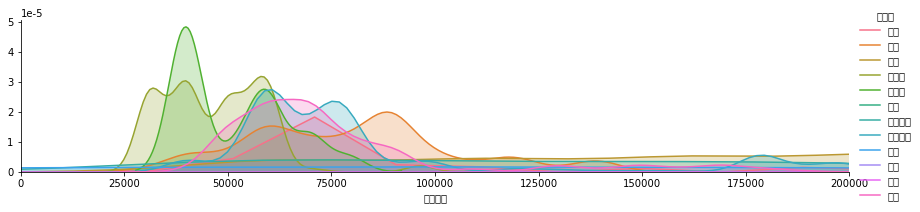

In [120]:
fig = sns.FacetGrid(code_date_data,hue='상품군', aspect=4)
fig.map(sns.kdeplot, '판매단가', shade=True)
max_profit = data['판매단가'].max()

fig.set(xlim=(0, 0.2e6))
fig.add_legend()

### 상품군 취급액 상관관계

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0, flags=flags)


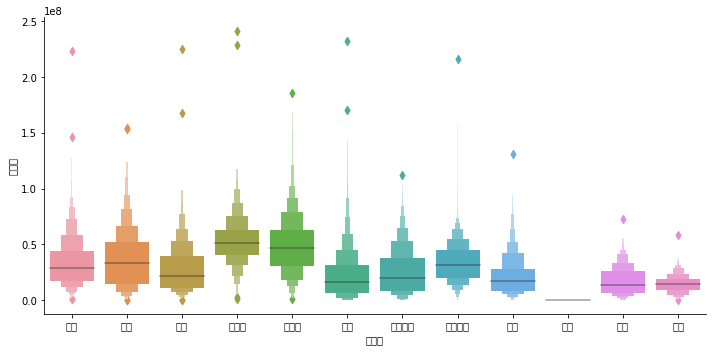

In [121]:
sns.catplot(x='상품군', y='취급액', kind='boxen', data=code_date_data, aspect=2)
# 총 이익

/home/jaewon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_a

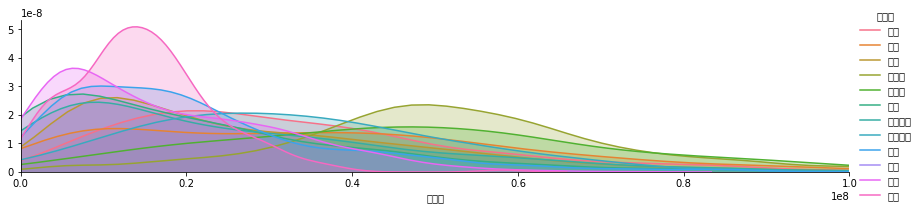

In [122]:
fig = sns.FacetGrid(code_date_data,hue='상품군', aspect=4)
fig.map(sns.kdeplot, '취급액', shade=True)
max_profit = data['취급액'].max()

fig.set(xlim=(0, 1e8))
fig.add_legend()

### 취급액 판매단가 상관관계

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py

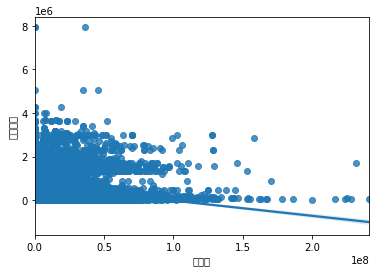

In [123]:
sns.regplot(x='취급액', y='판매단가', data=code_date_data)

# 취급액과 판매단가의 상관관계

In [8]:
code_date_data['날짜'] = pd.to_datetime(code_date_data['날짜'])

### 시간에 따른 총 판매 이익

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: Runt

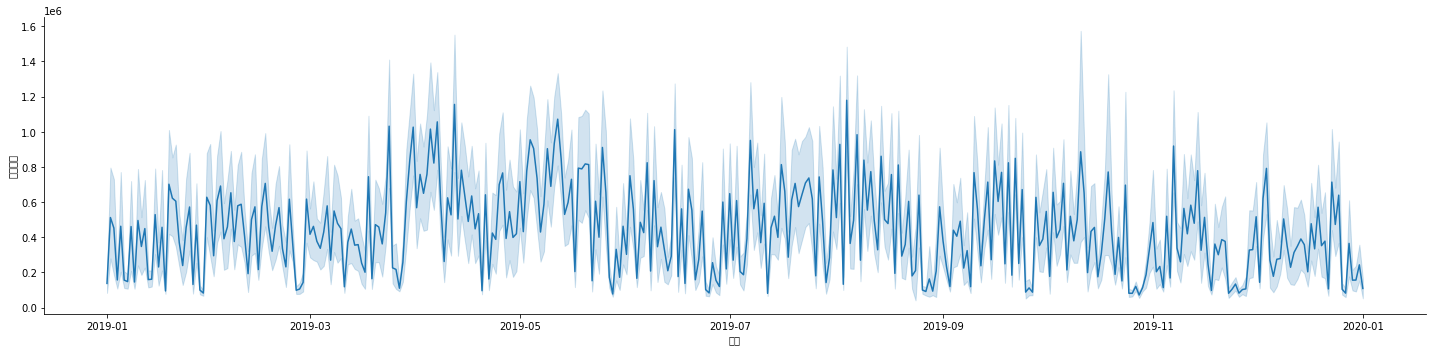

In [125]:
sns.relplot(x='날짜', y='판매단가', data=code_date_data, kind='line', aspect=4)

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: Runt

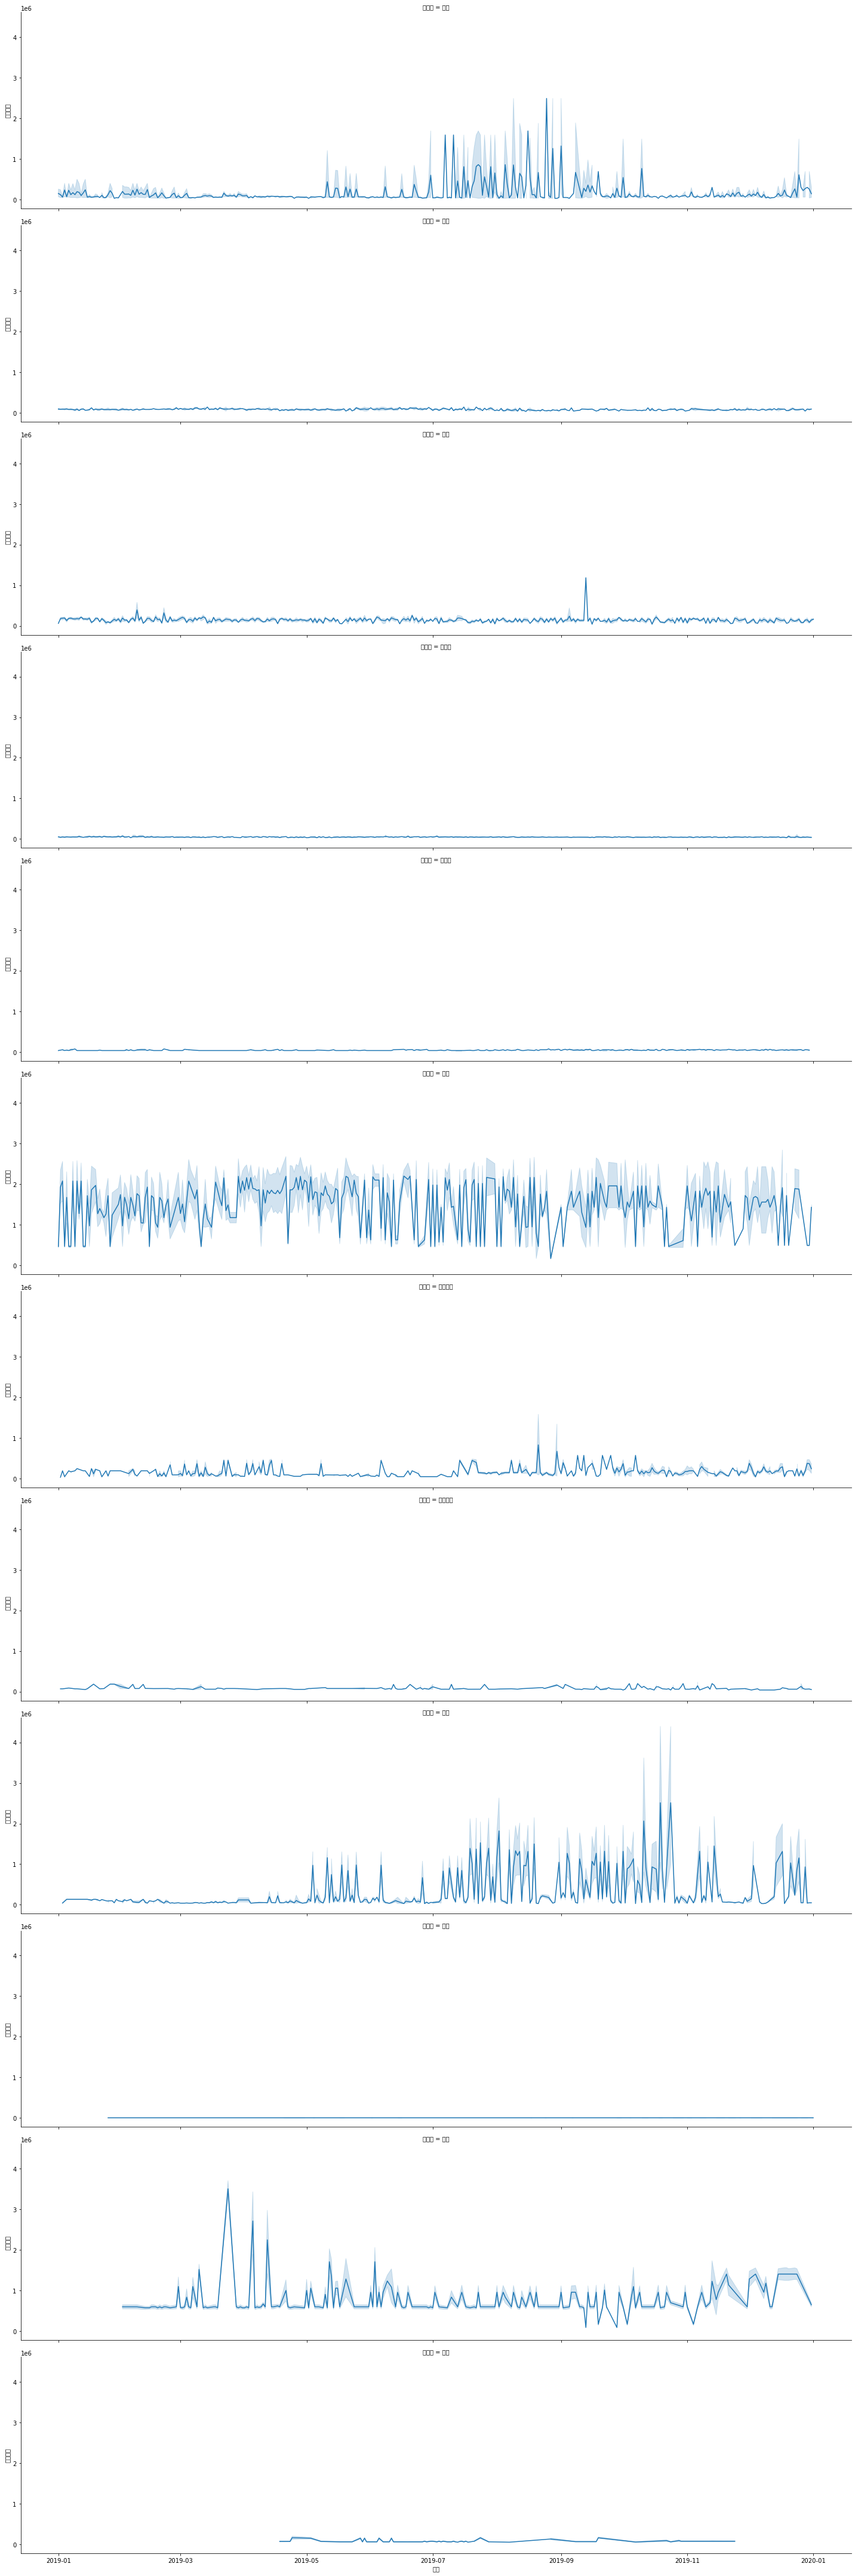

In [126]:
sns.relplot(x='날짜', y='판매단가', data=code_date_data, kind='line', row='상품군', aspect=4)

### 날짜에 따른 상품 판매 빈도

In [127]:
data_temp = code_date_data[['날짜', '상품군']].copy()
data_temp['count'] = 1
data_temp = data_temp.groupby(['날짜', '상품군'], as_index=False).sum()

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: Runt

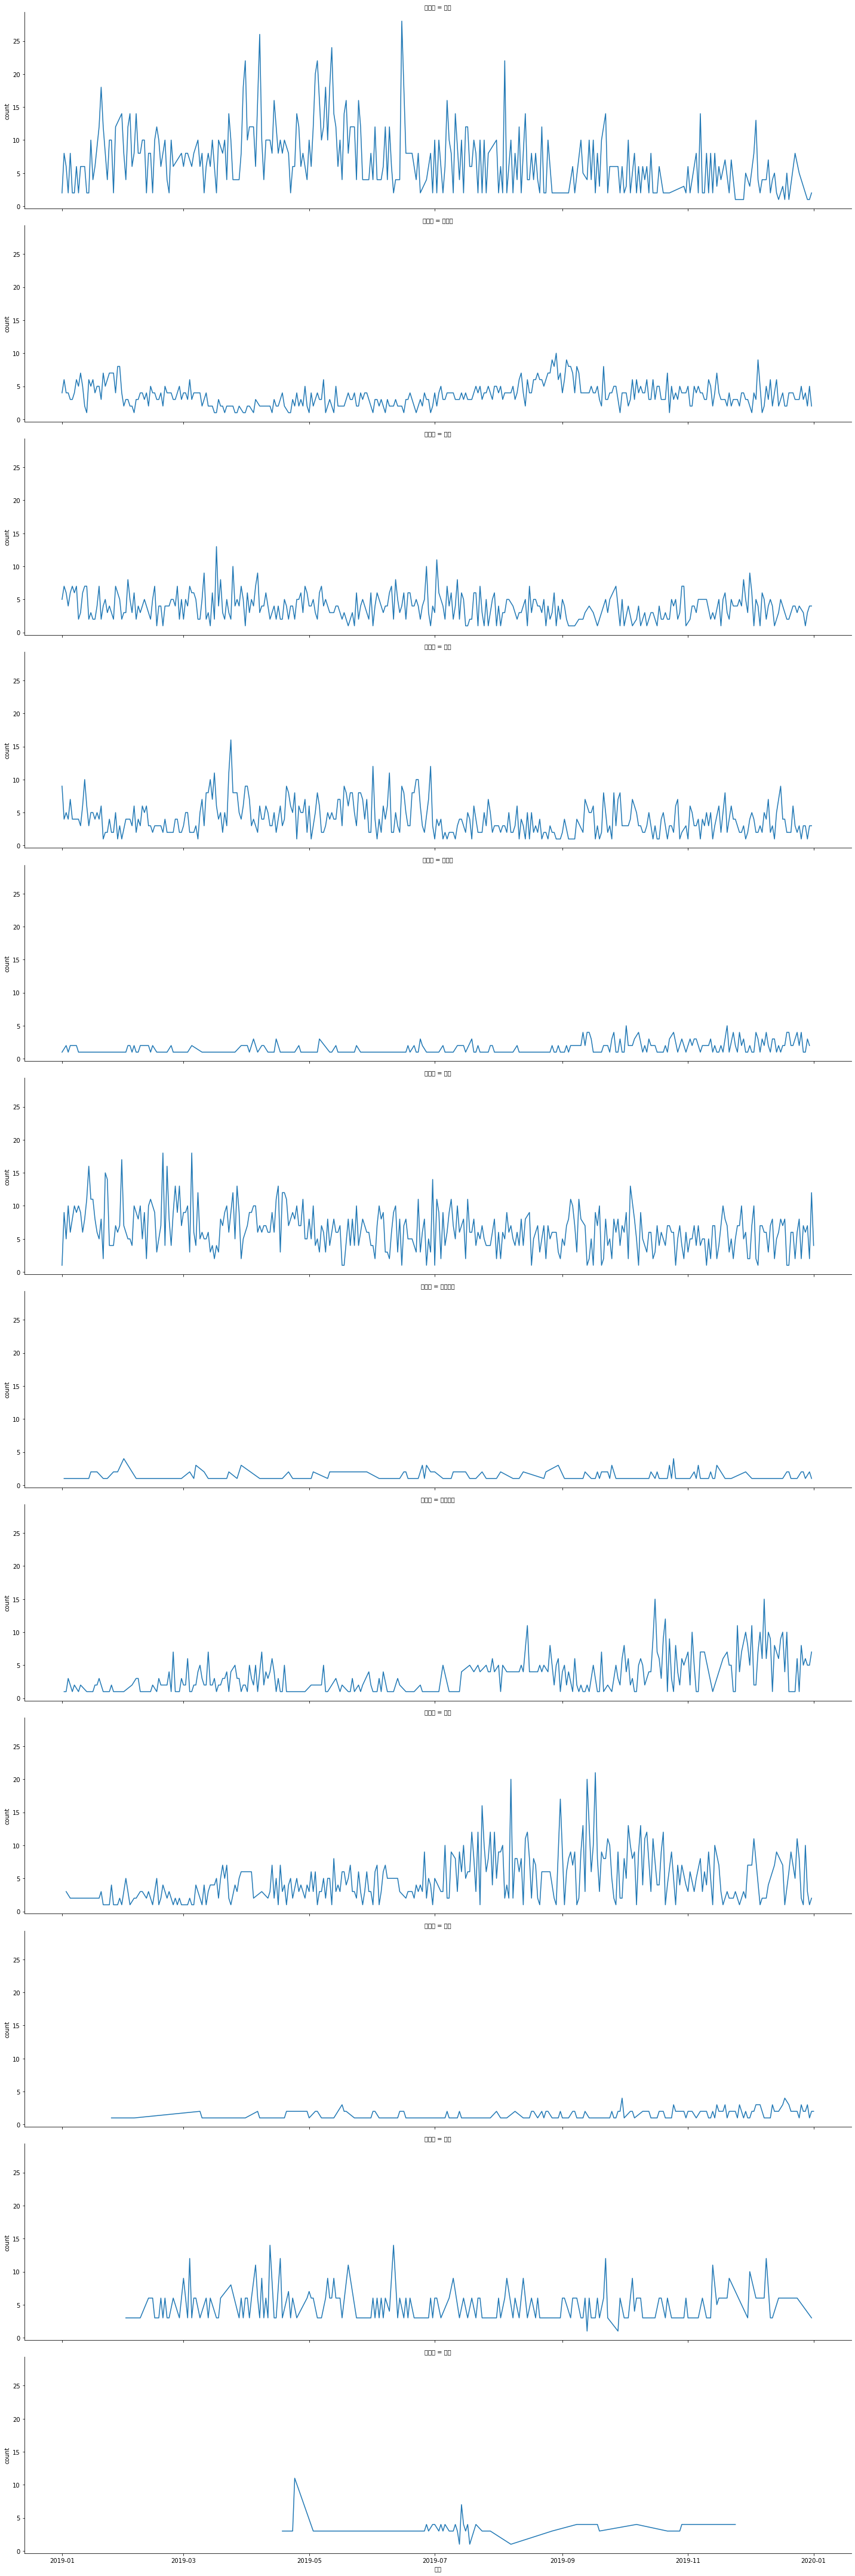

In [128]:
sns.relplot(x='날짜', y='count', row='상품군', data=data_temp, aspect=4, kind='line')

### 시간(분)당 매출

In [51]:
code_date_data['분당매출'] = code_date_data['취급액'] / code_date_data['누적노출']
data_temp = code_date_data.groupby(['방송일시', '상품코드', '상품명', '상품군'], 
                                   as_index=False)[['분당매출']].mean().sort_values(by='분당매출', ascending=False)

In [52]:
data_temp.head(10)
# 2019년 11월 2일에 판매된 '쌀'이 가장 높은 분당매출을 올렸다.

# Q. 분당매출이 높으면 최대 매출도 높을까?

,방송일시,상품코드,상품명,상품군,분당매출
10972,2019-11-02 17:40:00,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,5.704425e+06
12700,2019-12-21 17:40:00,201322,코몽트 덤블 플리스 자켓 2종,의류,5.587300e+06
13032,2020-01-01 00:00:00,201390,일시불쿠첸압력밥솥 10인용,주방,5.219600e+06
2487,2019-03-17 00:00:00,202058,남영비비안 소노르 베르사유 노와이어 컬렉션 브라,속옷,4.530350e+06
5778,2019-06-10 00:00:00,200220,아키 풀커버 라이크라 레이스 패키지(106차)(랜덤2세트추가),속옷,4.442100e+06
11488,2019-11-17 15:40:00,200248,(1등급)221L_딤채김치냉장고,가전,4.247675e+06
13,2019-01-01 16:40:00,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,4.194650e+06
12969,2019-12-30 00:00:00,200615,일시불 선일금고 이볼브 시리즈 EV-040,생활용품,4.188900e+06
11893,2019-11-29 23:00:00,200412,LG 울트라HD TV 65UM7900BNA,가전,3.863150e+06
12663,2019-12-20 14:00:00,201655,정직한 농부의 석류,건강기능,3.601083e+06


In [53]:
# 가장많이 팔린(매출이 높은)
code_date_data.groupby(['방송일시', '상품코드', '상품명', '상품군'], 
                                as_index=False)[['취급액']].sum().sort_values(by='취급액', ascending=False).head(10)

# A. 어느정도 연관성은 있다.

,방송일시,상품코드,상품명,상품군,취급액
11679,2019-11-22 19:00:00,201665,국내산 손질 햇 갑오징어 9팩,농수축,241079000
11893,2019-11-29 23:00:00,200412,LG 울트라HD TV 65UM7900BNA,가전,231789000
10972,2019-11-02 17:40:00,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,228177000
11845,2019-11-28 16:20:00,200869,한일 대용량 스텐 분쇄믹서기,주방,225084000
12700,2019-12-21 17:40:00,201322,코몽트 덤블 플리스 자켓 2종,의류,223492000
12663,2019-12-20 14:00:00,201655,정직한 농부의 석류,건강기능,216065000
11246,2019-11-10 17:00:00,200864,안동간고등어 20팩,농수축,199541000
11844,2019-11-28 15:00:00,202239,참존 탑뉴스 지이링클 기초세트,이미용,185927000
12722,2019-12-22 17:00:00,201007,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),이미용,177875000
11488,2019-11-17 15:40:00,200248,(1등급)221L_딤채김치냉장고,가전,169907000


/home/jaewon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend

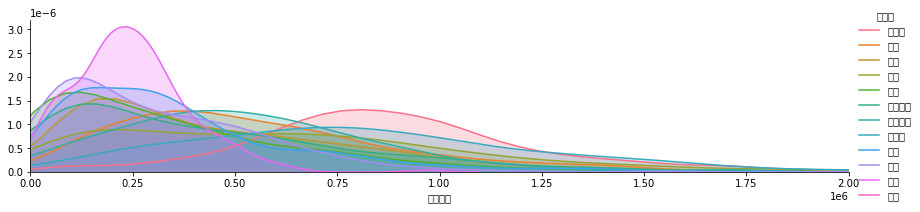

In [28]:
fig = sns.FacetGrid(data_temp,hue='상품군', aspect=4)
fig.map(sns.kdeplot, '분당매출', shade=True)
max_profit = data_temp['분당매출'].max()

fig.set(xlim=(0, 2e6))
fig.add_legend()

### 판매 개수가 가장 많은?
- 취급액 = 판매단가 X 판매수
    - 판매수 = 취급액 / 판매단가 (실제로 나눠떨어지지가 않음)

In [55]:
data_temp = code_date_data.copy()
data_temp['판매수'] = data_temp['취급액'] / data_temp['판매단가']

#### 상품군에 따른 판매수

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50743 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: Runt

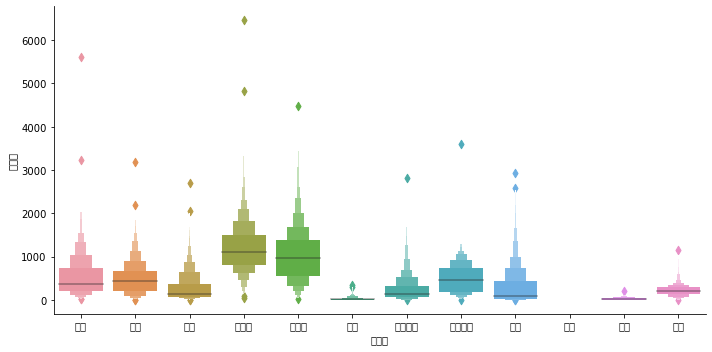

In [56]:
sns.catplot(x='상품군', y='판매수', kind='boxen', data=data_temp, aspect=2)

#### 총 판매수가 가장 많은

In [48]:
data_temp[['방송일시', '상품코드', '상품명', '판매수', '상품군']].sort_values("판매수", ascending=False).head(10)

# 주로 농수축에서 판매수가 가장 많음 (해산물이 좀 많음)
# 연말에 많이 팔림
# 저녁타임
# 농수축 -> 해산류, 육류, 풀
# Q.판매수가 소수점이 나오는 이유는?

,방송일시,상품코드,상품명,판매수,상품군
33178,2019-11-10 17:00:00,200864,안동간고등어 20팩,6457.637540,농수축
37356,2019-12-21 17:40:00,201322,코몽트 덤블 플리스 자켓 2종,5601.303258,의류
34385,2019-11-22 19:00:00,201665,국내산 손질 햇 갑오징어 9팩,4831.242485,농수축
37437,2019-12-22 17:00:00,201007,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),4469.221106,이미용
34667,2019-11-25 22:00:00,200199,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),4061.658291,이미용
34475,2019-11-23 23:00:00,201634,완도꼬마활전복 1.3kg,3877.056856,농수축
32371,2019-11-02 17:40:00,202513,멋진밥상 흥양농협 햅쌀 20kg,3873.972835,농수축
37256,2019-12-20 14:00:00,201655,정직한 농부의 석류,3607.095159,건강기능
32468,2019-11-03 17:00:00,201634,완도꼬마활전복 1.3kg,3414.347826,농수축
35024,2019-11-29 18:00:00,201004,국내산 손질 햇 갑오징어 9팩,3339.378758,농수축


#### 총 판매수가 가장 적은

In [77]:
data_temp[['방송일시', '상품코드', '상품명', '판매수', '상품군', '취급액']].sort_values("판매수", ascending=False).dropna().tail(30)
# 판매수 0 제외

# 판매수 1이하는 0 ?
# 주로 이른 아침 또는 늦은 밤

# Q. LG울트라 HD TV는 실제로 잘 안팔릴까?

,방송일시,상품코드,상품명,판매수,상품군,취급액
8716,2019-03-29 21:40:00,200456,무이자 LG 울트라HD TV 75UK6200KNB,0.016181,가전,50000
10184,2019-04-10 22:40:00,200456,무이자 LG 울트라HD TV 75UK6200KNB,0.016181,가전,50000
17080,2019-06-09 22:00:00,200456,무이자 LG 울트라HD TV 75UK6200KNB,0.016181,가전,50000
11280,2019-04-19 22:40:00,200456,무이자 LG 울트라HD TV 75UK6200KNB,0.016181,가전,50000
12054,2019-04-26 20:40:00,200456,무이자 LG 울트라HD TV 75UK6200KNB,0.016181,가전,50000
13482,2019-05-08 22:40:00,200456,무이자 LG 울트라HD TV 75UK6200KNB,0.016181,가전,50000
21970,2019-07-25 21:40:00,200458,무이자 LG 울트라HD TV 75UK7400KNA,0.015674,가전,50000
27704,2019-09-18 21:40:00,200459,무이자 LG 울트라HD TV 75UK7400KNA,0.015674,가전,50000
25260,2019-08-25 22:00:00,200458,무이자 LG 울트라HD TV 75UK7400KNA,0.015674,가전,50000
24418,2019-08-17 22:00:00,200458,무이자 LG 울트라HD TV 75UK7400KNA,0.015674,가전,50000


In [59]:
code_date_data[code_date_data['상품코드']==200456]

# A. 시작할때 이익이 50000으로 시작해서 그런 듯 하다.

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,이익,누적노출,분당매출
7605,2019-03-18 23:40:00,20,100148,200456,무이자 LG 울트라HD TV 75UK6200KNB,가전,3090000,7912000,2019-03-18,7912000,60,131866.666667
8716,2019-03-29 21:40:00,20,100148,200456,무이자 LG 울트라HD TV 75UK6200KNB,가전,3090000,50000,2019-03-29,50000,60,833.333333
8981,2019-03-31 23:00:00,20,100148,200456,무이자 LG 울트라HD TV 75UK6200KNB,가전,3090000,7912000,2019-03-31,7912000,60,131866.666667
9088,2019-04-01 22:40:00,20,100148,200456,무이자 LG 울트라HD TV 75UK6200KNB,가전,3090000,15347000,2019-04-01,15347000,60,255783.333333
9229,2019-04-02 23:40:00,20,100148,200456,무이자 LG 울트라HD TV 75UK6200KNB,가전,3090000,15322000,2019-04-02,15322000,60,255366.666667
9469,2019-04-04 23:40:00,20,100148,200456,무이자 LG 울트라HD TV 75UK6200KNB,가전,3090000,50000,2019-04-04,50000,60,833.333333
9705,2019-04-06 22:00:00,20,100148,200456,무이자 LG 울트라HD TV 75UK6200KNB,가전,3090000,15347000,2019-04-06,15347000,60,255783.333333
9852,2019-04-07 23:00:00,20,100148,200456,무이자 LG 울트라HD TV 75UK6200KNB,가전,3090000,22983000,2019-04-07,22983000,60,383050.000000
9970,2019-04-08 21:40:00,20,100148,200456,무이자 LG 울트라HD TV 75UK6200KNB,가전,3090000,7686000,2019-04-08,7686000,60,128100.000000
10184,2019-04-10 22:40:00,20,100148,200456,무이자 LG 울트라HD TV 75UK6200KNB,가전,3090000,50000,2019-04-10,50000,60,833.333333


In [67]:
data_temp[data_temp['이익'] > 50000][['방송일시','상품코드','상품명','상품군','판매단가','이익','판매수']].sort_values("판매수", ascending=False).dropna().tail(30)
# 판매 하위 30개
# Q. 전부다 판매개수 1이상일까?
# 잡화, 특히 귀금속이 잘 안팔림.

,방송일시,상품코드,상품명,상품군,판매단가,이익,판매수
12672,2019-05-02 20:40:00,200542,일시불 LG 휘센 씽큐 에어컨 스탠드형FQ17V9KWA1,가전,1899000,3472000,1.828331
16099,2019-05-31 22:40:00,200539,일시불 LG 휘센 씽큐 에어컨 2IN1형 FQ17V9KWA2,가전,2209000,4033000,1.825713
13511,2019-05-09 10:40:00,200539,일시불 LG 휘센 씽큐 에어컨 2IN1형 FQ17V9KWA2,가전,2209000,4033000,1.825713
13866,2019-05-11 23:40:00,200539,일시불 LG 휘센 씽큐 에어컨 2IN1형 FQ17V9KWA2,가전,2209000,4033000,1.825713
36945,2019-12-17 14:50:00,200073,버버리 홀스페리 페이톤 크로스백,잡화,880000,1571000,1.785227
37719,2019-12-25 10:50:00,200071,버버리 밀덴홀 체인 크로스백 미듐,잡화,1480000,2610000,1.763514
33542,2019-11-14 09:50:00,202332,[루이띠에]18k 샤인클로버 목걸이,잡화,1290000,2189000,1.696899
32870,2019-11-07 15:50:00,202310,[루이띠에] 18K 베르니아 팔찌 반지 세트,잡화,2030000,3417000,1.683251
33541,2019-11-14 09:50:00,202337,[루이띠에]18k 샤인클로버 팔찌반지 세트,잡화,2390000,4017000,1.680753
33539,2019-11-14 09:50:00,202335,[루이띠에]18k 샤인클로버 주얼리 세트,잡화,3990000,6670000,1.671679


In [71]:
# A. 그러하다
data_temp[data_temp['판매수'] >= 1][['방송일시','상품코드','상품명','상품군','판매단가','이익','판매수']].sort_values("판매수", ascending=False).dropna().tail(30)

# 하나가 다름
# 30731 	2019-10-16 23:40:00 	201272 	1세트 센티멘탈 디퓨저골드 	생활용품 	31000 	50000 	1.612903
# 판매 가격이 50000보다 낮다 그래서 위에서 안 걸림 ㅋㅋ (팔렸을까?)

,방송일시,상품코드,상품명,상품군,판매단가,이익,판매수
16099,2019-05-31 22:40:00,200539,일시불 LG 휘센 씽큐 에어컨 2IN1형 FQ17V9KWA2,가전,2209000,4033000,1.825713
13866,2019-05-11 23:40:00,200539,일시불 LG 휘센 씽큐 에어컨 2IN1형 FQ17V9KWA2,가전,2209000,4033000,1.825713
13511,2019-05-09 10:40:00,200539,일시불 LG 휘센 씽큐 에어컨 2IN1형 FQ17V9KWA2,가전,2209000,4033000,1.825713
36945,2019-12-17 14:50:00,200073,버버리 홀스페리 페이톤 크로스백,잡화,880000,1571000,1.785227
37719,2019-12-25 10:50:00,200071,버버리 밀덴홀 체인 크로스백 미듐,잡화,1480000,2610000,1.763514
33542,2019-11-14 09:50:00,202332,[루이띠에]18k 샤인클로버 목걸이,잡화,1290000,2189000,1.696899
32870,2019-11-07 15:50:00,202310,[루이띠에] 18K 베르니아 팔찌 반지 세트,잡화,2030000,3417000,1.683251
33541,2019-11-14 09:50:00,202337,[루이띠에]18k 샤인클로버 팔찌반지 세트,잡화,2390000,4017000,1.680753
33539,2019-11-14 09:50:00,202335,[루이띠에]18k 샤인클로버 주얼리 세트,잡화,3990000,6670000,1.671679
30731,2019-10-16 23:40:00,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,50000,1.612903


In [72]:
code_date_data[code_date_data['상품명'] == '1세트 센티멘탈 디퓨저골드']

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,이익,누적노출,분당매출
30731,2019-10-16 23:40:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,50000,2019-10-16,50000,60,833.333333
33233,2019-11-11 02:00:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,574000,2019-11-11,574000,60,9566.666667
37051,2019-12-18 14:00:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,179000,2019-12-18,179000,60,2983.333333


In [76]:
data[data['상품명'] == '1세트 센티멘탈 디퓨저골드']

# 동일 날짜 마지막쯤에서 취급액이 갑자기 줄어듬(항상)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,이익,누적노출
30727,2019-10-16 23:00:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,181000.0,2019-10-16 00:00:00,181000.0,20
30729,2019-10-16 23:20:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,443000.0,2019-10-16 00:00:00,443000.0,40
30731,2019-10-16 23:40:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,50000.0,2019-10-16 00:00:00,50000.0,60
33229,2019-11-11 01:20:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,181000.0,2019-11-11 00:00:00,181000.0,20
33231,2019-11-11 01:40:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,50000.0,2019-11-11 00:00:00,50000.0,40
33233,2019-11-11 02:00:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,574000.0,2019-11-11 00:00:00,574000.0,60
37047,2019-12-18 13:20:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,308000.0,2019-12-18 00:00:00,308000.0,20
37049,2019-12-18 13:40:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,308000.0,2019-12-18 00:00:00,308000.0,40
37051,2019-12-18 14:00:00,20,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,179000.0,2019-12-18 00:00:00,179000.0,60


### - 방송 시간대가 영향을 미칠까?

#### 시간별 매출

In [19]:
data_temp = data.copy()
data_temp['방송일시'] = pd.to_datetime(data_temp['방송일시'])
data_temp['month'] = data_temp['방송일시'].dt.month
data_temp['hour'] = data_temp['방송일시'].dt.hour

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0, flags=flags)


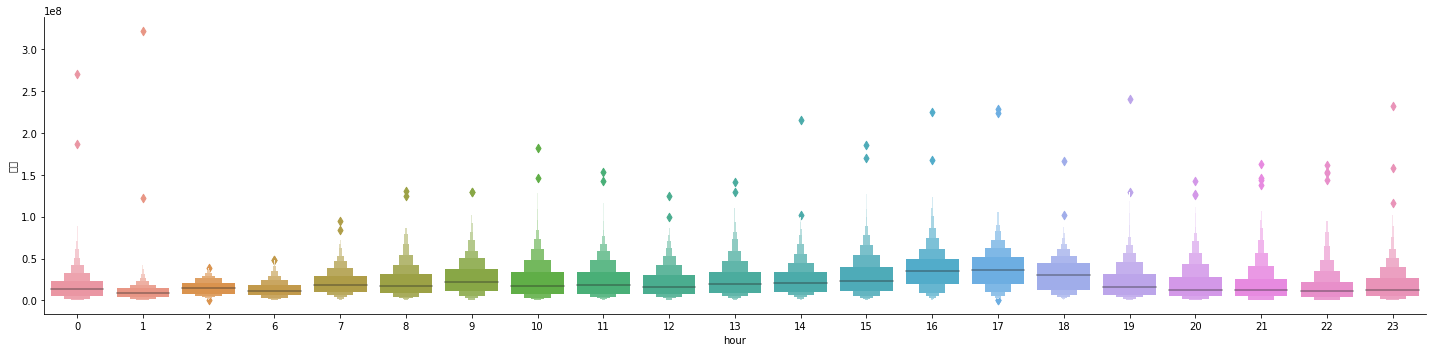

In [57]:
sns.catplot(x='hour', y='이익', kind='boxen', data=data_temp, aspect=4)

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0, flags=flags)


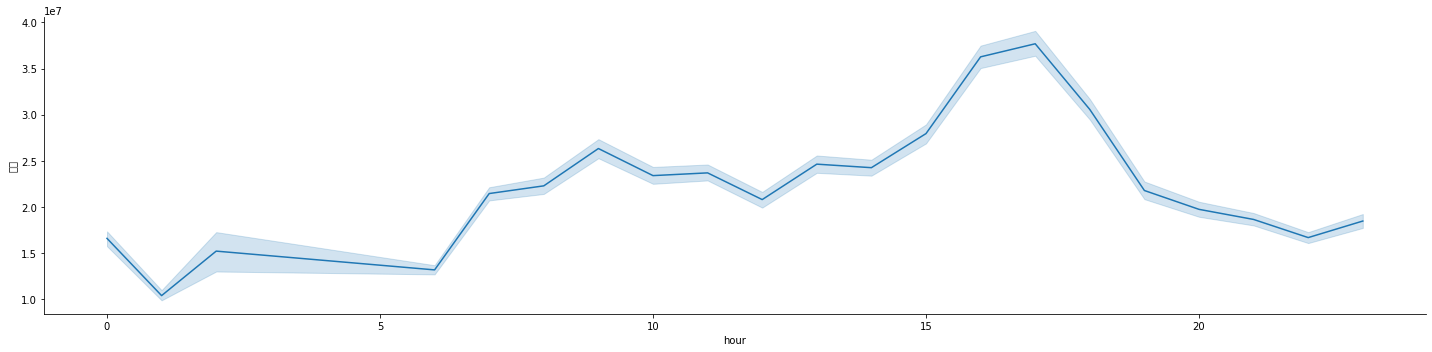

In [58]:
sns.relplot(x='hour', y='이익', kind='line', data=data_temp, aspect=4)

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0, flags=flags)


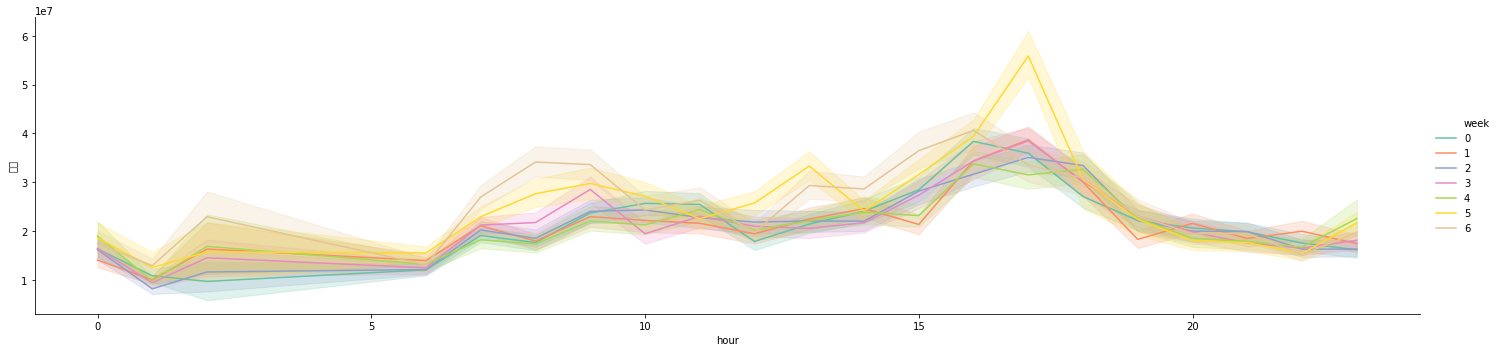

In [76]:
sns.relplot(x='hour', y='이익', kind='line',hue='week', data=data_temp, aspect=4, palette='Set2')

#### 요일별 매출

In [42]:
data_temp['week'] = data_temp['방송일시'].dt.weekday

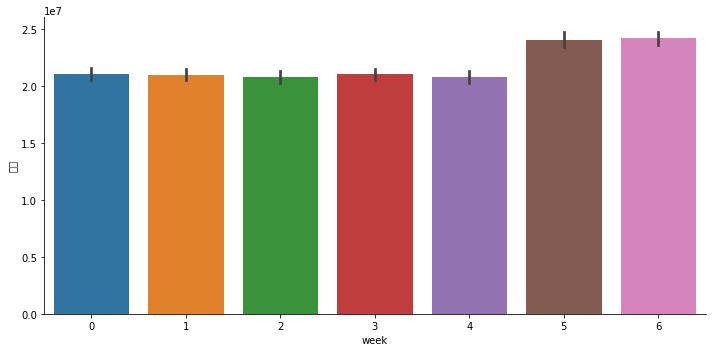

In [60]:
sns.catplot(x='week', y='이익', kind='bar', data=data_temp, aspect=2)

# 금, 토요일이 총 매출액이 높음

#### 월별 판매량

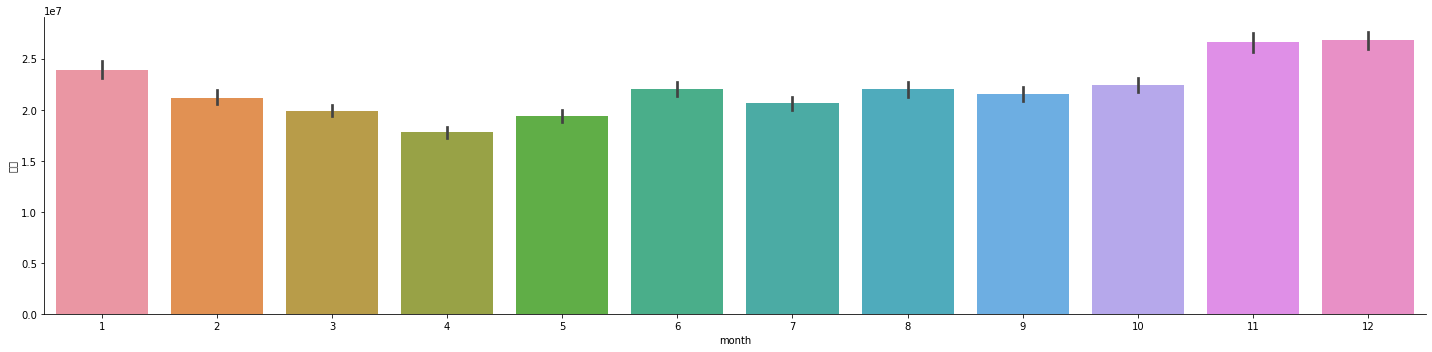

In [67]:
sns.catplot(x='month', y='이익', kind='bar', data=data_temp, aspect=4)

# 금, 토요일이 총 매출액이 높음

#### 시간별 판매량

In [61]:
data_temp['판매수'] = data_temp['이익'] / data_temp['판매단가']

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


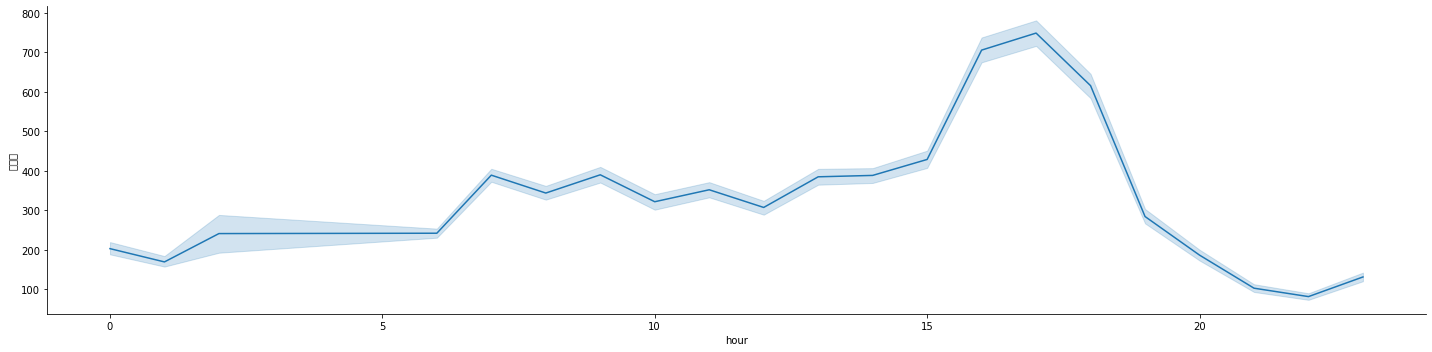

In [74]:
sns.relplot(x='hour', y='판매수', kind='line', data=data_temp, aspect=4, palette='Set1')

#### 요일별 판매량

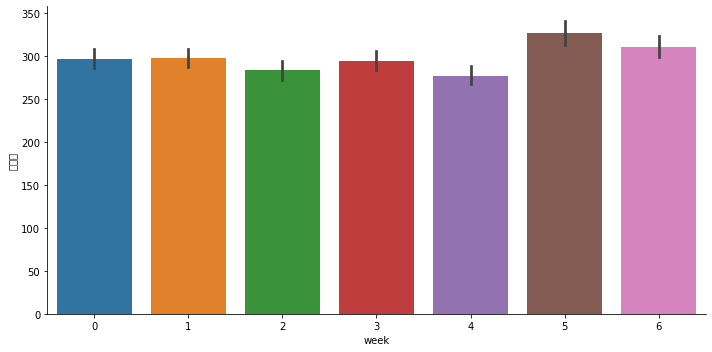

In [65]:
sns.catplot(x='week', y='판매수', kind='bar', data=data_temp, aspect=2)
# 수익과 마찬가지로 금, 토요일이 가장 많음

#### 월별 판매량

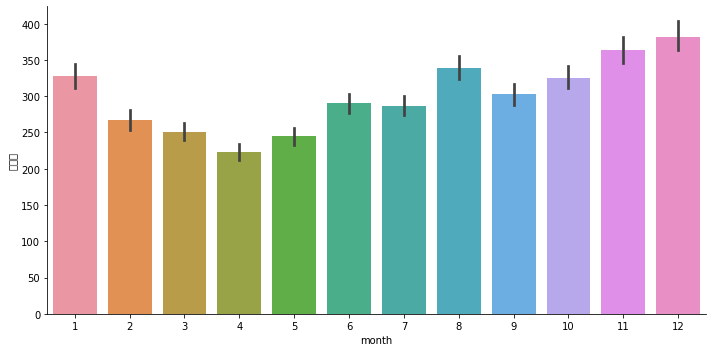

In [70]:
sns.catplot(x='month', y='판매수', kind='bar', data=data_temp, aspect=2)

#### 시간, 달, 이익

/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaewon/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0, flags=flags)


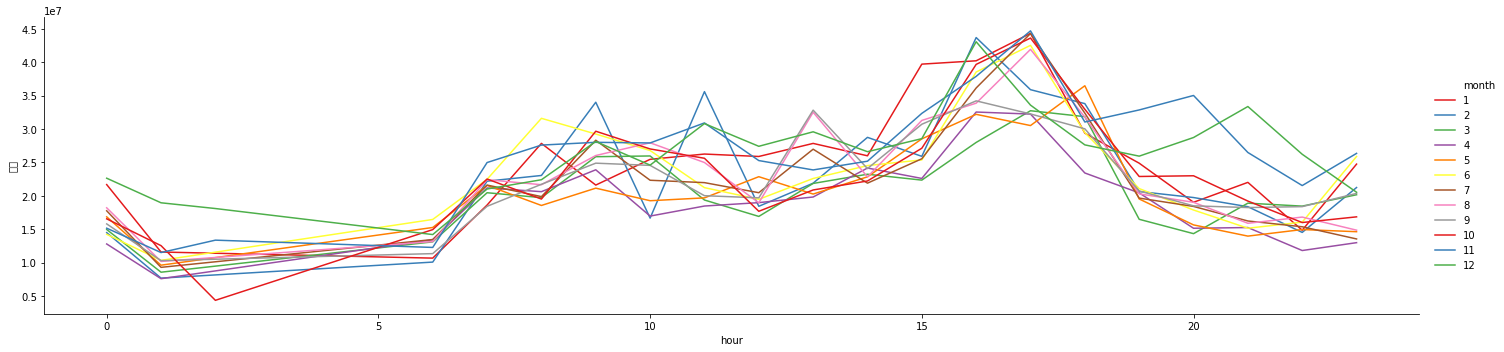

In [77]:
sns.relplot(x='hour', y='이익', kind='line', hue='month', data=data_temp, aspect=4, palette='Set1', ci=None)

### - 판매단가가 0인 경우 무조건 0일까?
- 그러하다

In [54]:
data[(data['판매단가']==0) & (data['이익'].fillna(0) != 0)]

# 판매단가가 0이면 무조건 이익도 0이다.

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,이익,누적노출


In [55]:
data[(data['판매단가']==0) & (data['취급액'].fillna(0) != 0)]

# 판매단가가 0이면 무조건 이익도 0이다.

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,이익,누적노출


## 주체 측에 물어봐야 할 질문들.
1. 연속된 방송에서 취급액이 갑자기 줄어드는 현상은 반품되는 것인가요?
2. 마더코드의 의미는 무엇인가요?
3. 상품명: '1세트 센티멘탈 디퓨저골드'의 경우 연속된 방송에서 갑자기 취급액 50000이 되는 현상이 있습니다. 왜 그런건가요?
4. 주로 방송을 시작할때 취급액이 50000인 경우가 있습니다. 왜 그런건가요?
5. 연속된 방송 중간중간에 취급액이 50000이 되는 경우가 있습니다. 오류인가요? 만약에 오류라면 예측할대도 50000으로 예측해야하는건가요?
6. 판매단가가 취급액보다 낮은 경우에는 항상 취급액이 50000입니다. 의미가 무었인가요?
7. 취급액 = 판매단가 X 팬매수 라고 적혀있는데, 실제로 주어진 공식에 따라 판매수를 구해보면 정수가 나옵니다. 왜 그런건가요?
8. 취급액은 방송중 발생하는 판매액의 총합인가요? 만약에 맞다면 몇몇 데이터에서 취급액이 줄어드는 현상이 있습니다. 반품때문에 그런가요?